# Probabilistic Modelling to classify Heart Disease 

-------

<p>Advanced Machine Learning Semester Project</p>
<p>NAML84112: ADVANCED MACHINE LEARNING</p>
<p>Kyle Groenewald</p>
<p>Student no.: 201710099</p>

--------

## Objective

The purpose of the project is to investigate and evaluate the application of probabilistic modelling in diagnosing heart disease. The data provided is a subset of the data given [here](https://archive.ics.uci.edu/ml/datasets/Heart+Disease/).

For a patient to be diagnosed, several factors are considered by medical professions before making a judgment. A subset of these factors were recorded in the dataset and we are now assigned with the responsibility of making diagnoses. Even though we're not doctors, what we do have, is data. 

Probabilistic models are built using probabilities and attempt to quantify uncertainty. The uncertainty in this specific case is the uncertainty of a random patient, given all their information, to have heart disease. To put it more bluntly, we are finding the probability of heart disease, given all the factors. Using Bayes' theorem, it is inferred that

P(heart disease | all the feature variables) = P(all the feature variables | heart disease) * P(heart disease) / P(all the feature variables)

For the following dataset we will compute the probability of obtaining one of two classes, having heart disease (target = 1) or not having heart disease (target = 0) given several variables. The preprocessing involves preparing the variables for the model. Model building involves building and evaluating the model and closing remarks will provide commentary on the results.

## Preprocessing

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [150]:
data = pd.read_csv('Heart.csv', header=0, sep = ';')
print(data)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

In [149]:
# Dimension of dataset
print("Dataset dimensions: ", data.ndim)
# No of. rows and columns of dataset
print("Dataset has ", data.shape[0], " rows.","\nDataset has ", df.shape[1], " columns.\n")
# Finding out the data types
print("Data Types :")
print(data.dtypes)

Dataset dimensions:  2
Dataset has  303  rows. 
Dataset has  14  columns.

Data Types :
age           int64
sex           int64
cp            int64
trestbps      int64
chol        float64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


NaN and Null check.

In [4]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

No missing values or na values.

In [6]:
data.duplicated().sum()

1

1 value is duplicated, it is very unlikely that a patient would have the exact same values for 13 features so we can safely assume that it is infact a duplicate and remove it.

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


302 rows, so 1 row has been removed.

In [9]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
for i in data:
    print("Unique values for {:<10}: {:<5} \n".format(i, data[i].nunique()))

Unique values for age       : 41    

Unique values for sex       : 2     

Unique values for cp        : 4     

Unique values for trestbps  : 49    

Unique values for chol      : 152   

Unique values for fbs       : 2     

Unique values for restecg   : 3     

Unique values for thalach   : 91    

Unique values for exang     : 2     

Unique values for oldpeak   : 40    

Unique values for slope     : 3     

Unique values for ca        : 5     

Unique values for thal      : 4     

Unique values for target    : 2     



Values with higher unique values (>10) are considered as numerical variables, i.e age, trestbps, chol, thalach, oldpeak.
The rest of the values are considered as categorical variables.

In [11]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

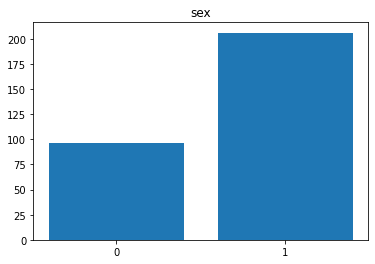

1    206
0     96
Name: sex, dtype: int64


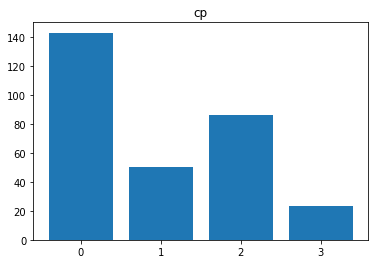

0    143
2     86
1     50
3     23
Name: cp, dtype: int64


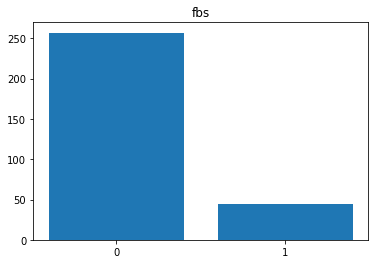

0    257
1     45
Name: fbs, dtype: int64


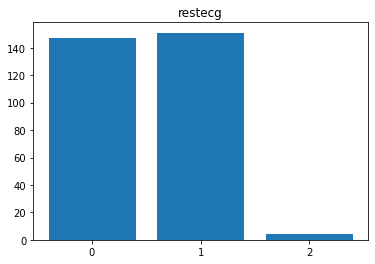

1    151
0    147
2      4
Name: restecg, dtype: int64


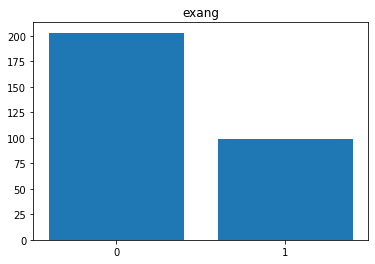

0    203
1     99
Name: exang, dtype: int64


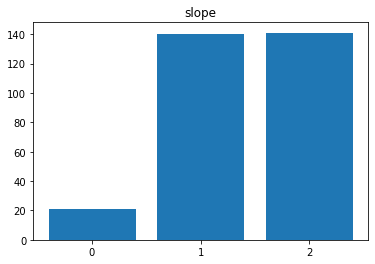

2    141
1    140
0     21
Name: slope, dtype: int64


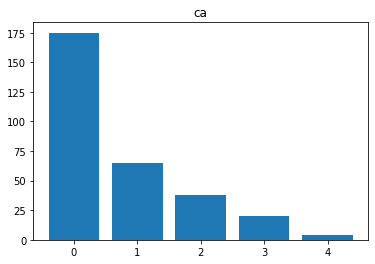

0    175
1     65
2     38
3     20
4      4
Name: ca, dtype: int64


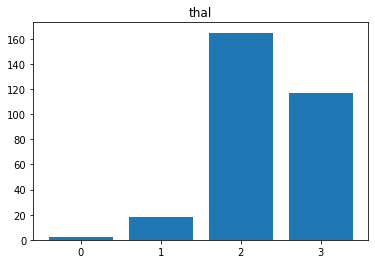

2    165
3    117
1     18
0      2
Name: thal, dtype: int64


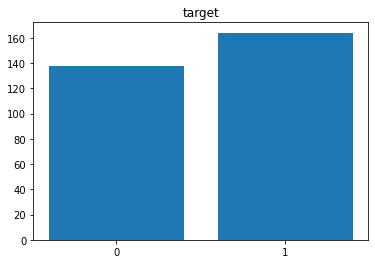

1    164
0    138
Name: target, dtype: int64


In [12]:
for col in ['sex', 'cp', 'fbs', 'restecg','exang', 'slope', 'ca', 'thal', 'target']:
    counts = data[col].value_counts()
    positions = counts.index
    plt.bar(positions, counts.values, tick_label=positions)
    plt.title(col)
    plt.show()
    print(counts)

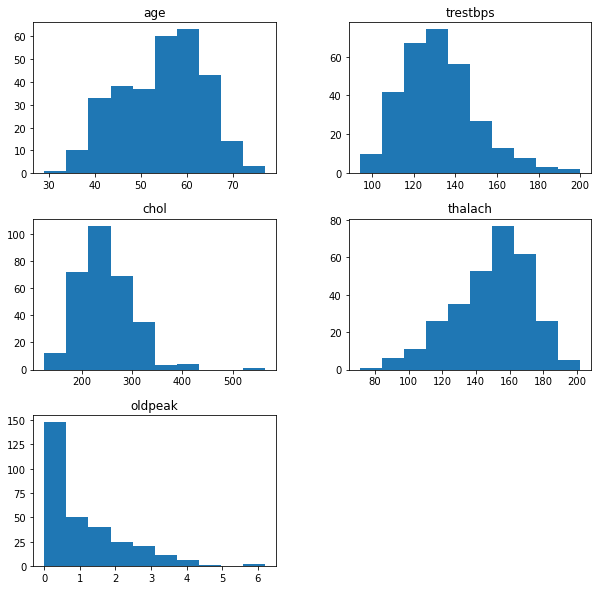

In [13]:
data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].hist(figsize=(10, 10), grid=False)
plt.show()

Oldpeak seems to be skewed to the left, so let's see what the skewness is for the numeric data.

In [14]:
print("Skewness for age: {:.4f}".format(data['age'].skew()))
print("Skewness for trestbps: {:.4f}".format(data['trestbps'].skew()))
print("Skewness for chol: {:.4f}".format(data['chol'].skew()))
print("Skewness for thalach: {:.4f}".format(data['thalach'].skew()))
print("Skewness for oldpeak: {:.4f}".format(data['oldpeak'].skew()))

Skewness for age: -0.2037
Skewness for trestbps: 0.7165
Skewness for chol: 1.1473
Skewness for thalach: -0.5327
Skewness for oldpeak: 1.2662


It would appear that chol is also skewed to the left with a skewness > 1. The rest of the data is relatively symmetrical.

In [15]:
new = pd.DataFrame()
new['oldpeak_sq'] = np.sqrt(df['oldpeak'])
new['chol_sq'] = np.sqrt(df['chol'])

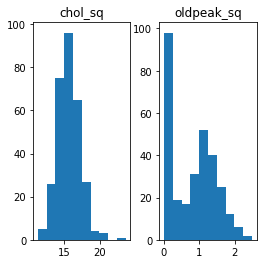

In [16]:
new[['chol_sq', 'oldpeak_sq']].hist(figsize=(4, 4), grid=False)
plt.show()

In [101]:
df = data

In [102]:
df['oldpeak'] = new['oldpeak_sq']
df['chol'] = new['chol_sq']

In [18]:
df = df.rename(columns={'oldpeak': 'oldpeak_sq', 'chol': 'chol_sq'})

Square root transformation was applied, it was selected because the log transformation wouldn't work on the 0 values present in the oldpeak column. To keep the transformations consistent, the transformation was also used for chol. 

In [19]:
print("New skewness for oldpeak: {:.4f}".format(df['oldpeak_sq'].skew()))
print("New skewness for chol: {:.4f}".format(df['chol_sq'].skew()))

New skewness for oldpeak: 0.1551
New skewness for chol: 0.5632


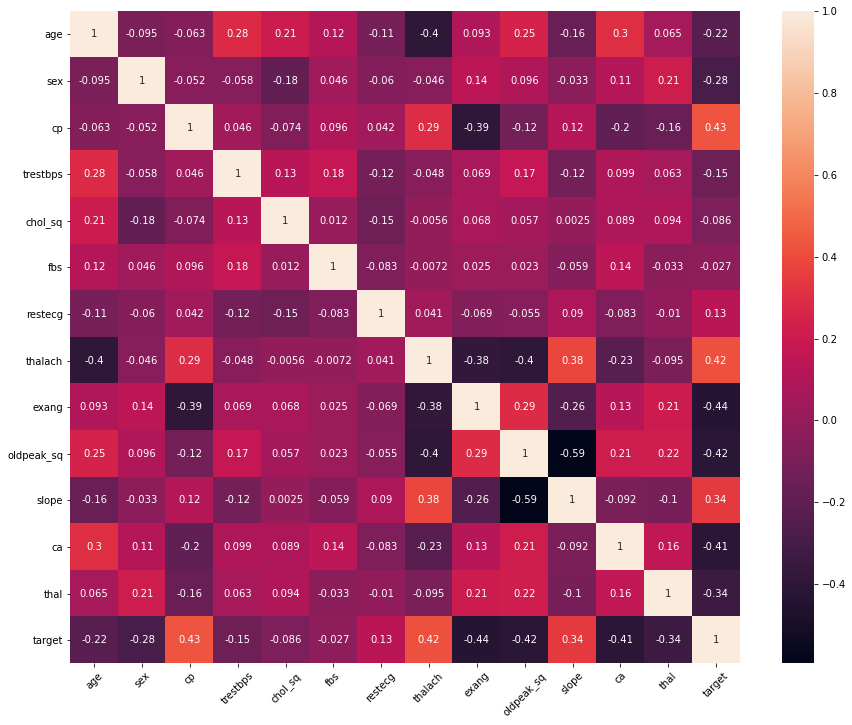

In [20]:
# Creating the correlation matrix
corr = df.corr()

# Plotting the correlation matrix on a heatmap
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(corr, annot=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
plt.show()

Using 14 variables will prove to be a large computation later when developing the model, so to minimize computation and to select important features the 3 largest positive correlating variables and 3 largest negative variables were selected. Along with these the age and sex were selected for use in making predictions.



Variables chosen: age, sex, cp, thalach, exang, oldpeak_sq, slope, ca.

In [72]:
df = df.drop(['trestbps', 'chol_sq', 'fbs', 'restecg', 'thal'], axis=1)

In [21]:
sel_categorical = ['sex', 'cp', 'exang', 'slope','ca']
sel_numerical = ['age', 'thalach', 'oldpeak_sq']

The selected categories (above) will be used to create the x values fed to the model. A dataframe is created with the selected features. A preview is also displayed.

In [22]:
sel_df = df[sel_numerical+sel_categorical]

In [23]:
sel_df[:5]

,age,thalach,oldpeak_sq,sex,cp,exang,slope,ca
0,63,150,1.516575,1,3,0,0,0
1,37,187,1.870829,1,2,0,0,0
2,41,172,1.183216,0,1,0,2,0
3,56,178,0.894427,1,1,0,2,0
4,57,163,0.774597,0,0,1,2,0


The function below is used to display the plots for the categorical variables in relation to the target i.e. heart disease or no heart disease diagnosis.

In [24]:
def count_plots(df, col):
    # Get counts
    has_hd = df[col][df.target == 1].value_counts().sort_index()
    has_nohd = df[col][df.target == 0].value_counts().sort_index()
    
    # Get plot positions from number of unique values
    positions = np.arange(0, len(df[col].unique()))
    
    plt.figure(figsize=(8, 6))
    plt.bar(positions + 0.35, has_nohd, width=0.3, label='No Heart Disease')
    plt.bar(positions, has_hd, width=0.3, label='Heart Disease')
    plt.xticks(positions + 0.35/2, has_hd.index) 
    plt.legend()
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.show();

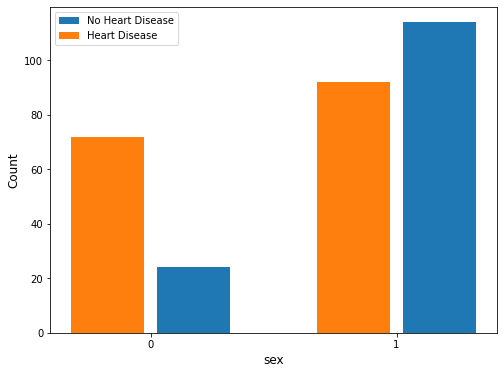

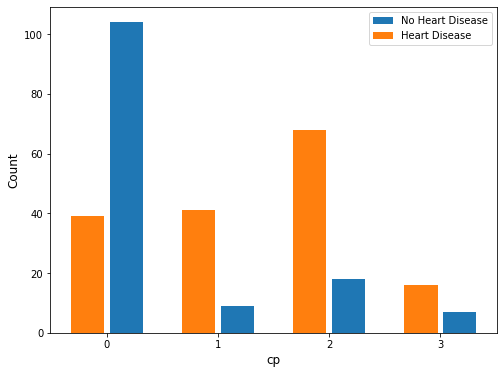

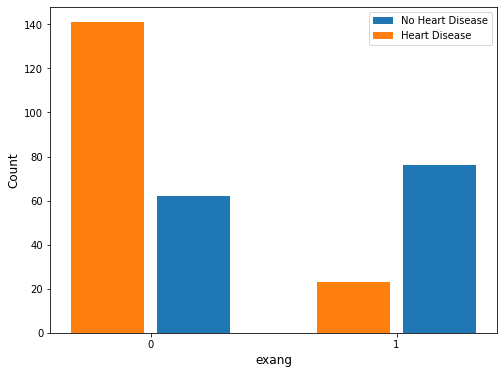

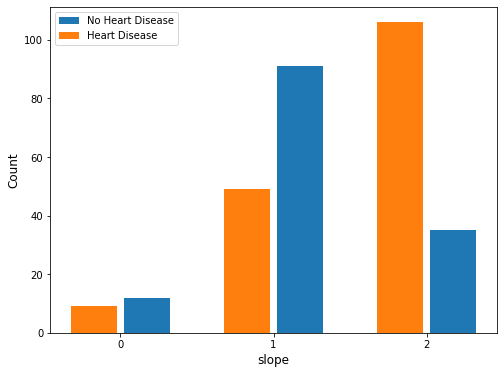

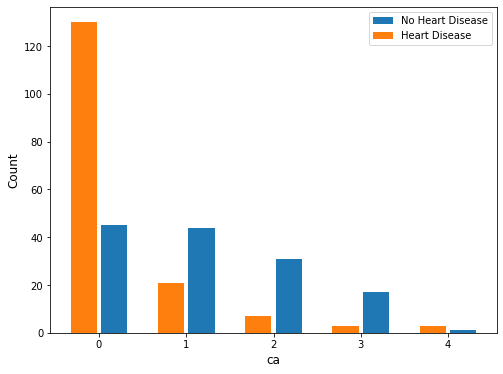

In [25]:
for col in sel_categorical:
    count_plots(df, col)

Findings from these plots is that there is a even distribution of heart disease diagnoses for males (sex=1) but for females the count for heart disease is higher. For the chest pain type, type zero has the least likelihood for heart disease. Patients with exercise induced angina (exang =1) the chances of heart disease are lower and for ca type 0 the chances are much higher than other types.

The values below show the distribution correlation between heart disease/no heart disease and the ages, maximum heart rate achieved (thalach) and square root of ST depression heart induced by exercise (oldpeak_sq).

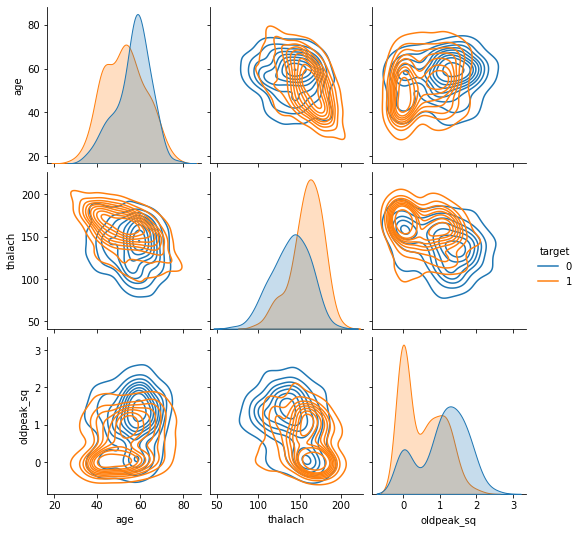

In [26]:
sns.pairplot(df[sel_numerical + ['target']],
            hue = 'target',
            kind = 'kde',
            diag_kind = 'auto')
plt.show()

## Model Building

In [27]:
import pymc3 as pm
import theano.tensor as tt
import arviz as az

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [28]:
Y = pd.Categorical(df['target']).codes
x_n = sel_df
x_c = x_n-x_n.mean()

For simplicity's sake (and my own), the variables are arranged in a way that corresponds with the common nomenclature of finding an output (Y) using a linear equation with combination of x variables (x_n). The variables are then centered (which with hindsight given the outputs later on, may prove to be a contributing factor to the poor performance of the model) around the mean.

Previews of the variables are given below:

In [29]:
x_n[:5]

,age,thalach,oldpeak_sq,sex,cp,exang,slope,ca
0,63,150,1.516575,1,3,0,0,0
1,37,187,1.870829,1,2,0,0,0
2,41,172,1.183216,0,1,0,2,0
3,56,178,0.894427,1,1,0,2,0
4,57,163,0.774597,0,0,1,2,0


In [30]:
Y[:5]

array([1, 1, 1, 1, 1], dtype=int8)

In [31]:
x_c[:5]

,age,thalach,oldpeak_sq,sex,cp,exang,slope,ca
0,8.57947,0.430464,0.733273,0.317881,2.036424,-0.327815,-1.397351,-0.718543
1,-17.42053,37.430464,1.087526,0.317881,1.036424,-0.327815,-1.397351,-0.718543
2,-13.42053,22.430464,0.399913,-0.682119,0.036424,-0.327815,0.602649,-0.718543
3,1.57947,28.430464,0.111125,0.317881,0.036424,-0.327815,0.602649,-0.718543
4,2.57947,13.430464,-0.008706,-0.682119,-0.963576,0.672185,0.602649,-0.718543


The model selected was a multiple linear regression model (also perhaps a choice made contributing to the later poor results), given it's nature to include multiple independent features to find an outcome. 

In [33]:
with pm.Model() as model_0:
    
    a1 = pm.Normal('a1', mu=0, sd=5, shape = 2)
    b = pm.Normal('b', mu=0, sd=1, shape=(len(x_n.columns),2))
    e = pm.HalfCauchy('e', 5)
    
    mu = pm.Deterministic('mu', a1 + pm.math.dot(x_n.values, b))
    theta = tt.nnet.softmax(mu)



    y1 = pm.Categorical('y1', p=theta, observed=Y)
    
    # Future correction:
    # y1 = pm.Categorical('y1', p=theta, sd=e, observed=Y)
    
    
    trace_0 = pm.sample(1000, random_seed=100, chains =2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [e, b, a1]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 58081 seconds.
The acceptance probability does not match the target. It is 0.9192193538450608, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
There were 136 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6531630672995866, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The rhat statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.


*The model above omits the standard deviation (error) parameter when sampling for y1, another mistake on my part. Also, anecdotal, but worth noting that the processing time of the initialization for only 2 chains is over 16 hours.*

In [103]:
az.summary(trace_0)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a1[0],0.469,3.456,-6.147,7.612,0.402,0.285,69.0,112.0,1.06
a1[1],0.536,3.627,-6.953,6.803,0.487,0.346,61.0,134.0,1.04
"b[0,0]",-0.013,0.635,-1.335,1.195,0.051,0.043,151.0,207.0,1.06
"b[0,1]",-0.030,0.633,-1.337,1.182,0.050,0.045,154.0,207.0,1.07
"b[1,0]",-0.224,0.722,-1.381,1.083,0.203,0.147,12.0,31.0,1.15
...,...,...,...,...,...,...,...,...,...
"mu[299,1]",-32.832,111.149,-194.763,191.078,33.465,24.319,11.0,146.0,1.15
"mu[300,0]",-24.172,91.454,-155.642,159.958,27.528,20.004,11.0,144.0,1.15
"mu[300,1]",-27.264,91.290,-159.570,156.556,27.412,19.917,11.0,146.0,1.15
"mu[301,0]",-39.643,131.697,-239.981,208.949,39.840,28.959,11.0,46.0,1.16


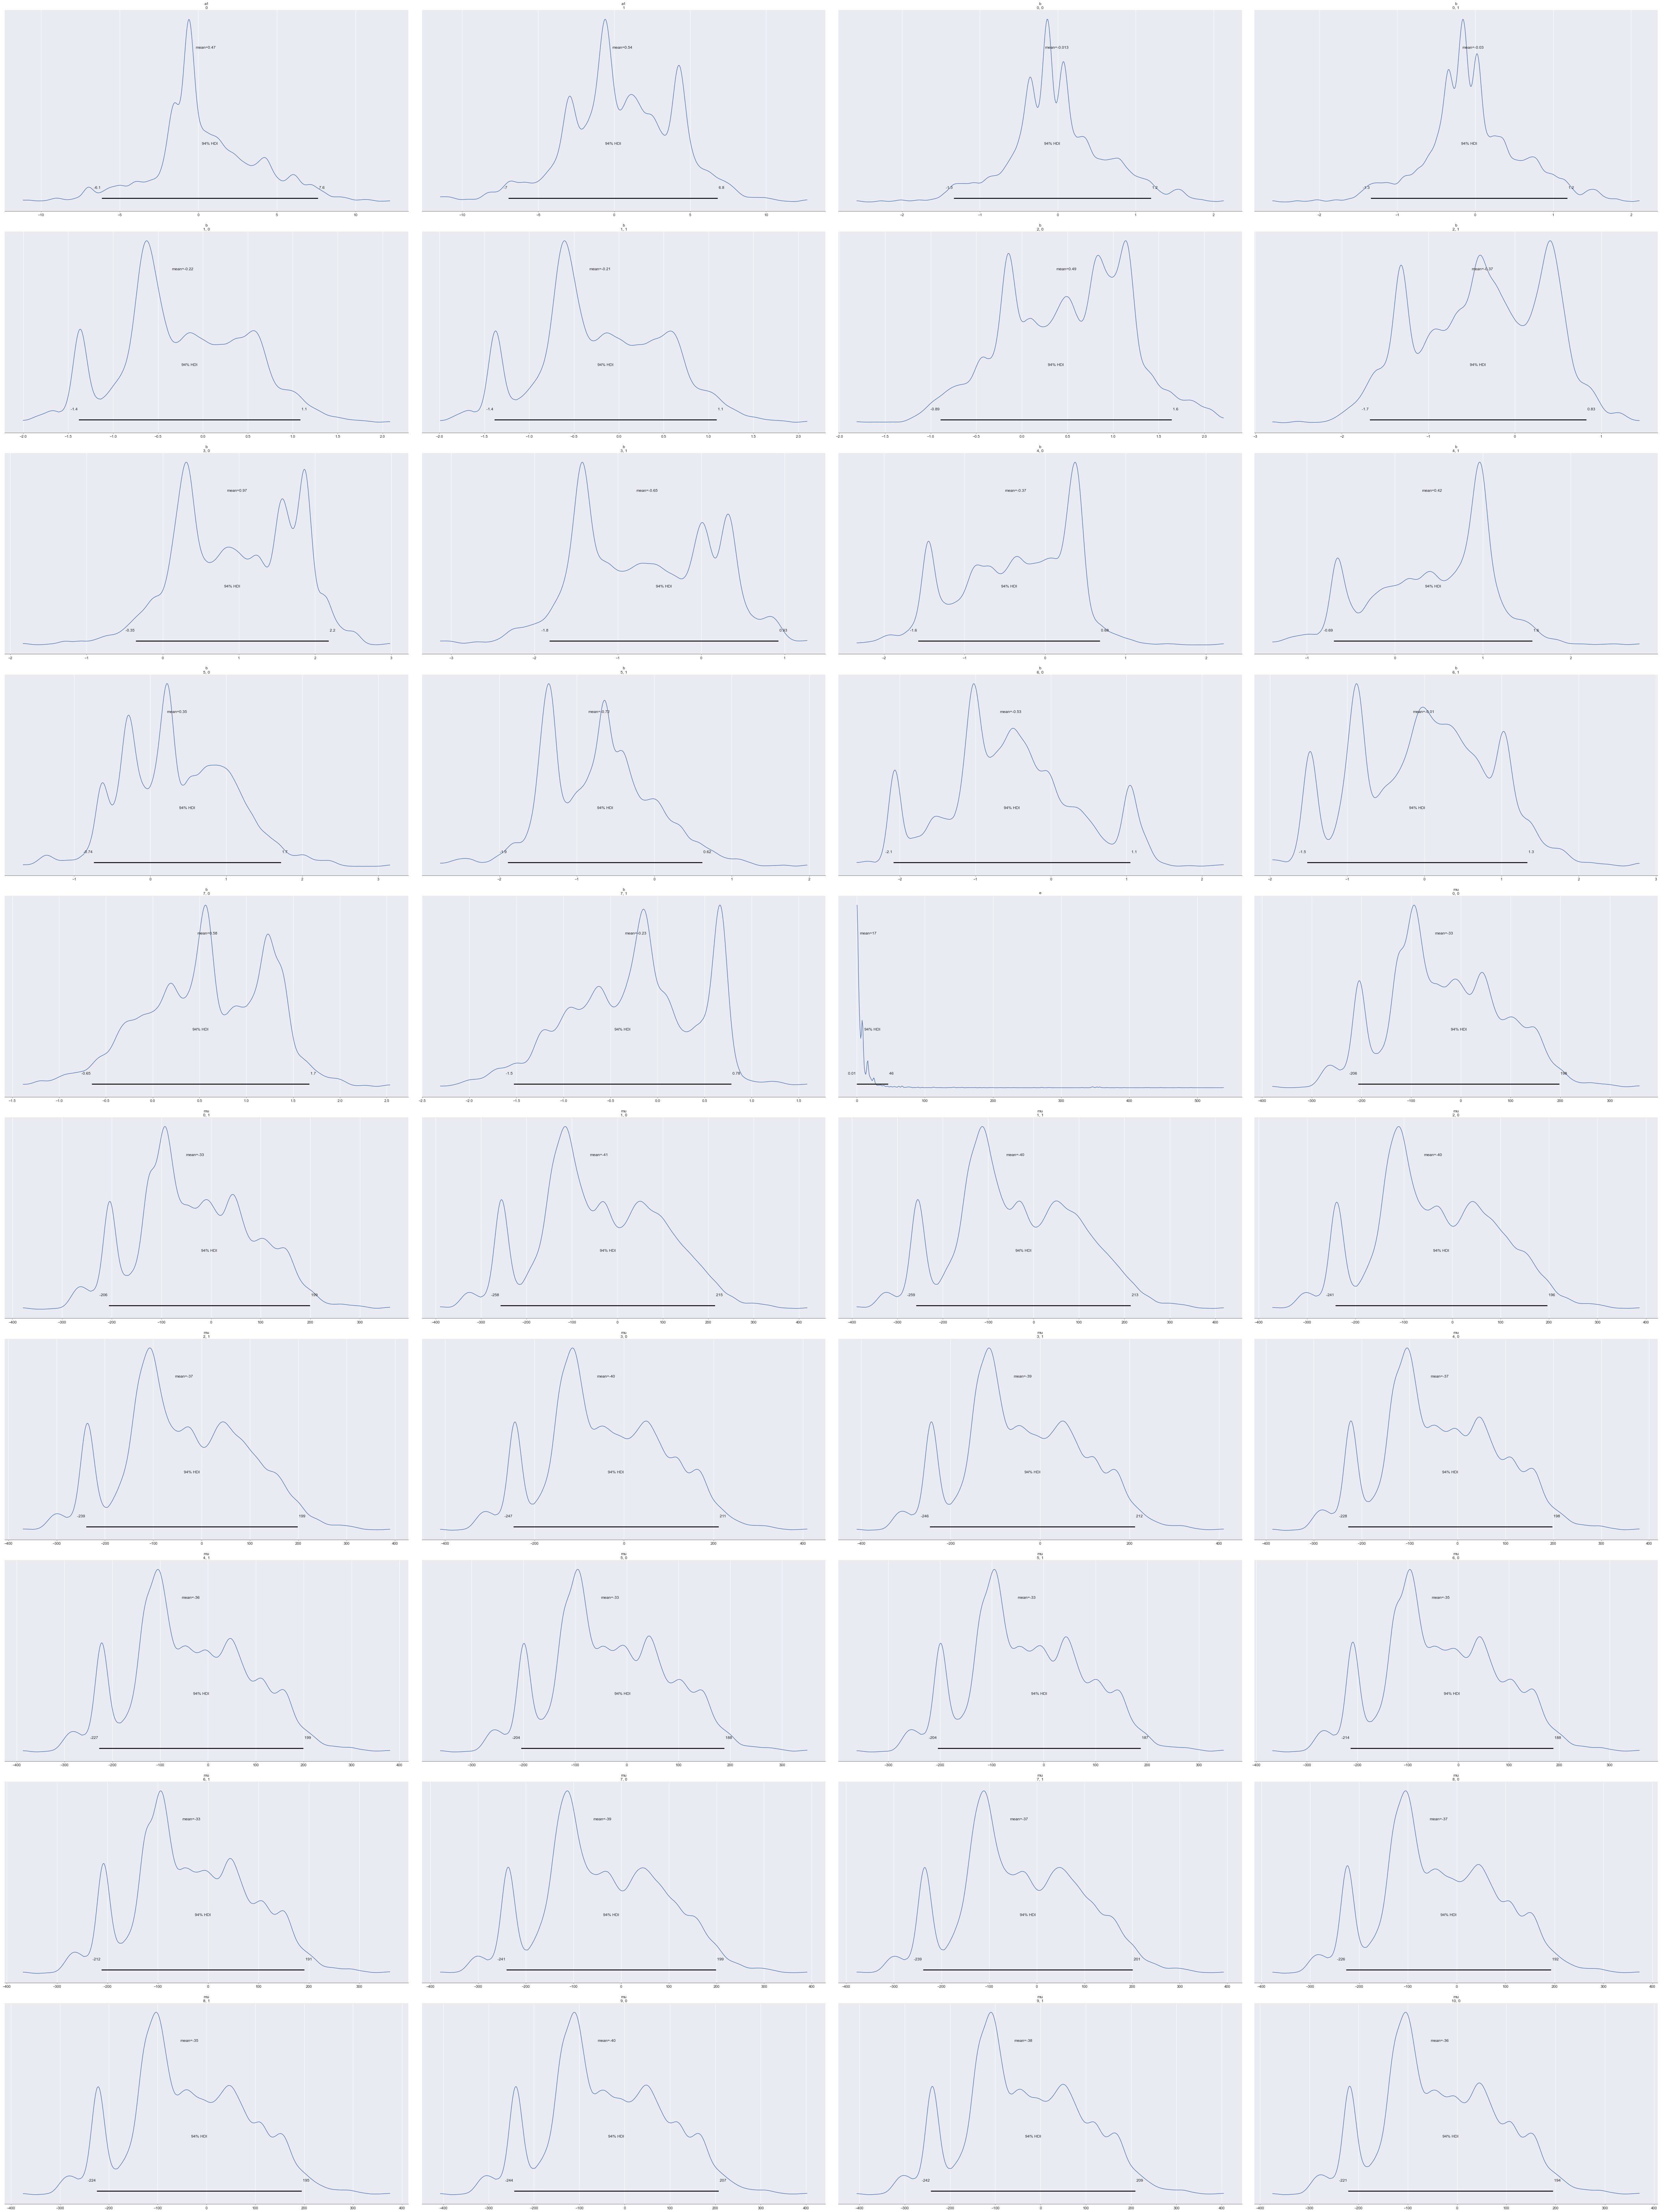

In [113]:
az.plot_posterior(trace_0)
plt.show()

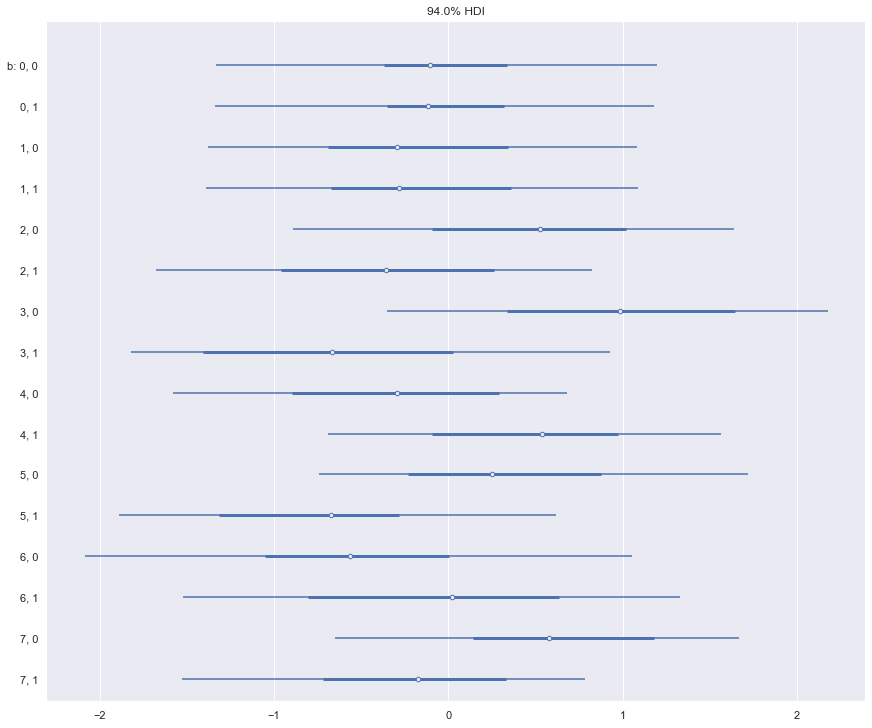

In [110]:
az.plot_forest(trace_0, var_names=['b'], combined=True, figsize=(12,10))
plt.show()

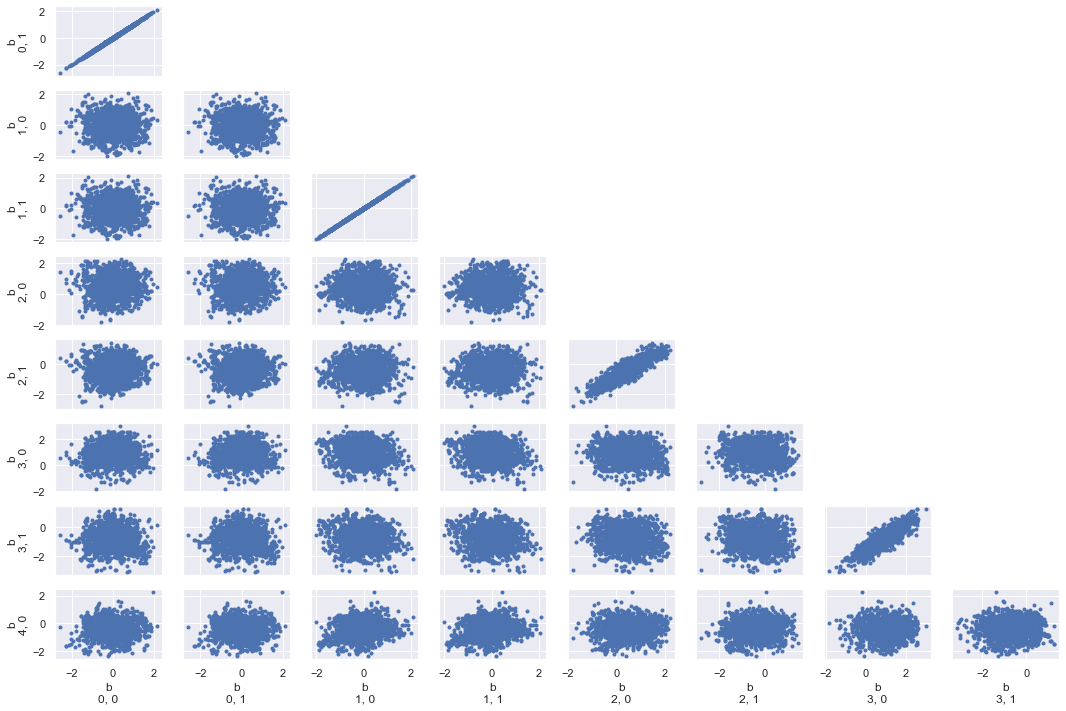

In [116]:
az.plot_pair(trace_0, var_names=['b'], figsize=(18,12))
plt.show()

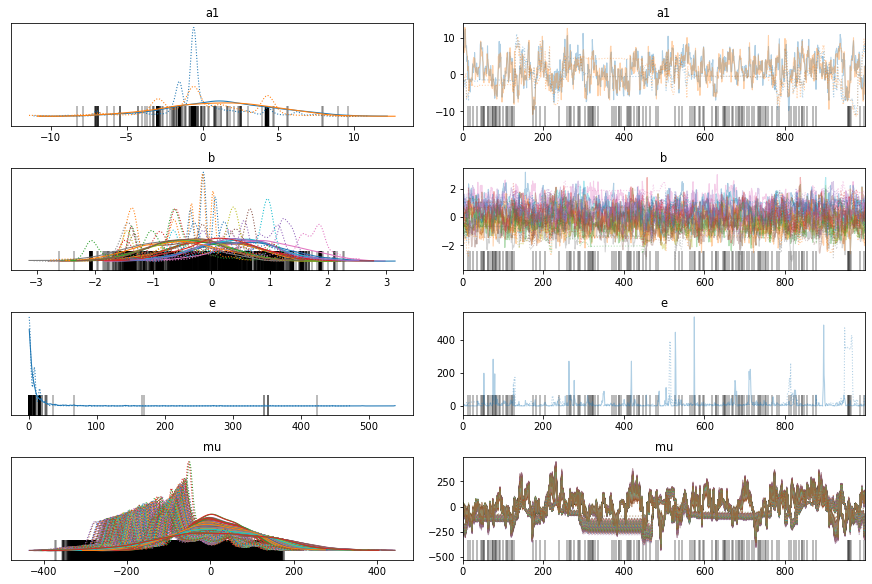

In [35]:
az.plot_trace(trace_0)
plt.show()

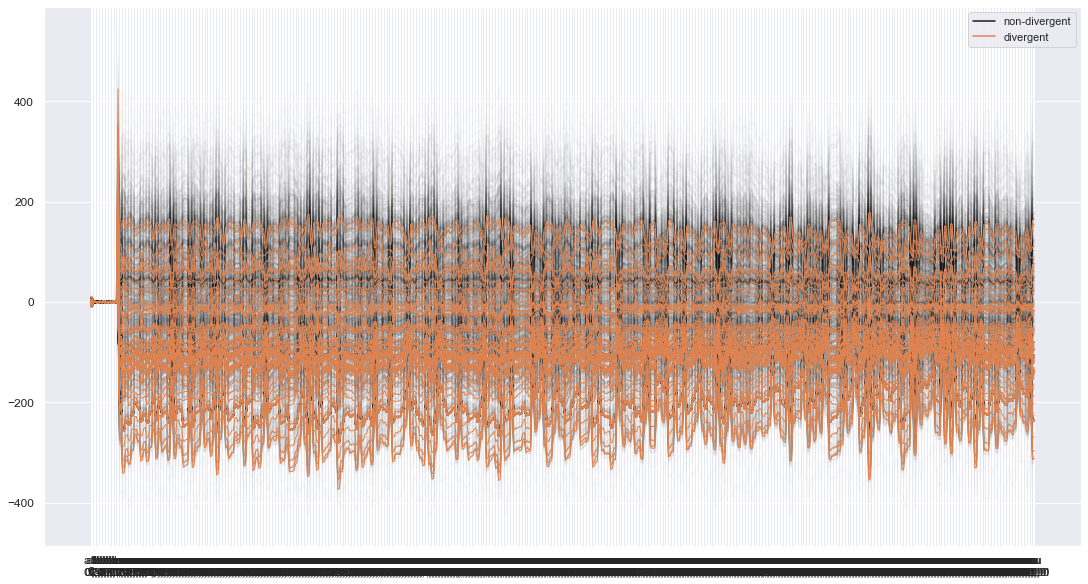

In [152]:
# az.plot_parallel(trace_0)
# plt.show()

The tails may seem quite wide in the HDI model but this is very misleading, the values are between -2 and 2, which is a fair result. This is further inspected by looking at the pairplot. The pariplot shows some correlations between beta values (perhaps better variable selection is required, or development of better features) but for the most part the variables are independent from one another. The KDE in the traces are quite erratic in b and mu values which could indicate the need for better samples or a deeper underlying problem with the model. A possible reparation could be to sample more independent chains or a larger sample space.

Below, using the model, predictions are simluated and variables are previewed. The initial model results computes the values in terms of probabilities of being part of the two classes and the prediction is simulated using rounding off.

In [52]:
data_pred = trace_0['mu'].mean(0)
y_pred = [np.exp(point)/np.sum(np.exp(point), axis=0)
 for point in data_pred]

In [154]:
y_pred[:5].mean()

0.5

In [54]:
y_pred = (np.array(y_pred))

In [55]:
y_pred[:5]

array([[0.33167012, 0.66832988],
       [0.3491675 , 0.6508325 ],
       [0.05733506, 0.94266494],
       [0.2219103 , 0.7780897 ],
       [0.29279666, 0.70720334]])

In [60]:
y_pred[1,0]

0.34916749925074864

In [64]:
y_pred.shape

(302, 2)

In [65]:
len(y_pred)

302

In [56]:
Y[:5]

array([1, 1, 1, 1, 1], dtype=int8)

In [68]:
target_predictions = []

for i in range(len(y_pred)):
    
    if (y_pred[i,0] >= 0.5):
        target_predictions.append(1)
    else:
        target_predictions.append(0)

In [86]:
pred_accuracy = np.sum(target_predictions==Y) / len(Y) * 100

In [90]:
print("Number of accurate predictions: ", np.sum(target_predictions==Y))
print("Number of inaccurate predictions: ", np.sum(target_predictions!=Y))
print("Prediction accuracy: {:.2f} %".format(pred_accuracy))

Number of accurate predictions:  53
Number of inaccurate predictions:  249
Prediction accuracy: 17.55 %


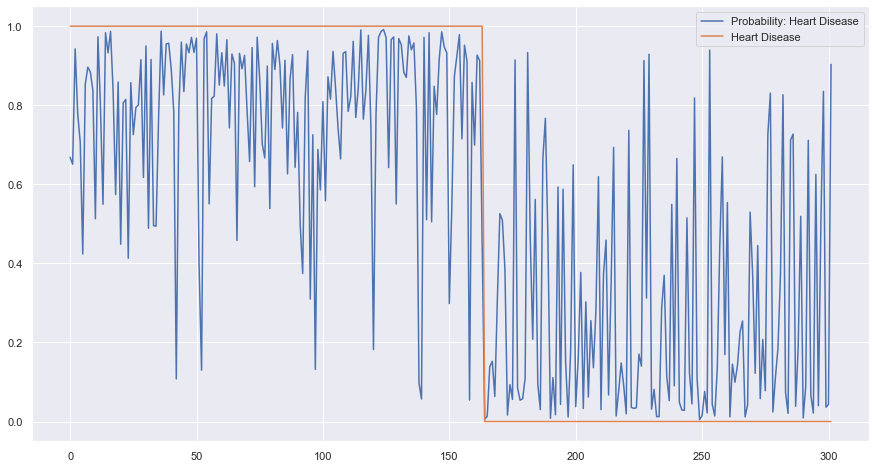

In [137]:
plt.plot(y_pred[:,1], label = 'Probability: Heart Disease')
plt.plot(Y, label = 'Heart Disease')
plt.legend()
plt.show()

The measure of accuracy of 17% is correct, but given the graph displaying probability, perhaps error is a better metric. Sklearn mean squared error is a function which would make computation easier.

In [138]:
from sklearn.metrics import mean_squared_error

In [140]:
loss_pm = mean_squared_error(Y, y_pred[:,1])

To measure the success of the model, it is compared to other models using (simulated) prediction accuracy

## Comparison to others models.

In [73]:
df.head()

,age,sex,cp,thalach,exang,oldpeak_sq,slope,ca,target
0,63,1,3,150,0,1.516575,0,0,1
1,37,1,2,187,0,1.870829,0,0,1
2,41,0,1,172,0,1.183216,2,0,1
3,56,1,1,178,0,0.894427,2,0,1
4,57,0,0,163,1,0.774597,2,0,1


A reminder of the data selected. Accuracy score is the criteria selected to measure successful prediction.

In [77]:
from sklearn.metrics import accuracy_score

The data is then split into train and test subsets.

In [74]:
from sklearn.model_selection import train_test_split

predictors = df.drop("target",axis=1)
target = df["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

### Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [142]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)
loss_lr = mean_squared_error(Y_pred_lr, Y_test)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 80.33 %


### Naive Bayes

In [79]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [143]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)
loss_nb = mean_squared_error(Y_pred_nb, Y_test)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


### SVM

In [81]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [144]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)
loss_svm = mean_squared_error(Y_pred_svm, Y_test)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %


## Remarks

In [94]:
algorithms = ["Probabilistic Mult. Logistic Regression","Logistic Regression","Naive Bayes","Support Vector Machine"]
scores = [pred_accuracy, score_lr, score_nb, score_svm]

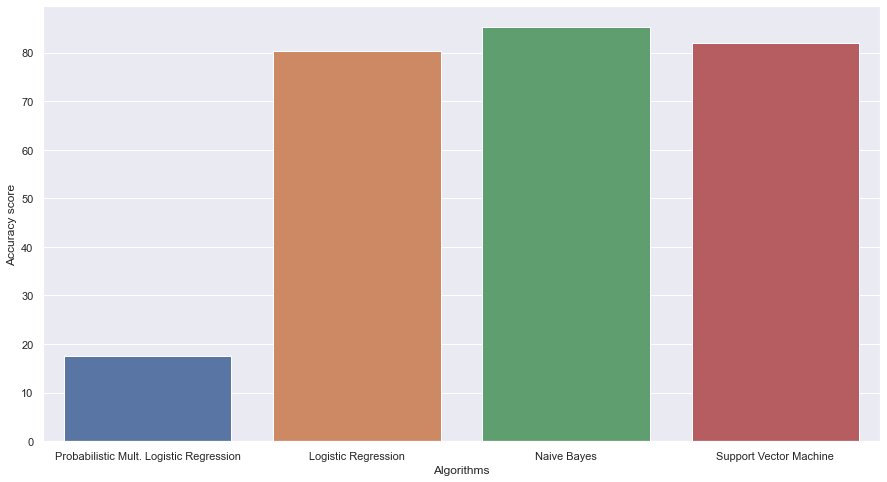

In [95]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)
plt.show()

In [145]:
print("Loss for PM Model: {:.4f}".format(loss_pm))
print("Loss for Logistic Reg Model: {:.4f}".format(loss_lr))
print("Loss for Naive Bayes Model: {:.4f}".format(loss_nb))
print("Loss for SVM Model: {:.4f}".format(loss_svm))

Loss for PM Model: 0.1212
Loss for Logistic Reg Model: 0.1967
Loss for Naive Bayes Model: 0.1475
Loss for SVM Model: 0.1803


The probabilistic model performs very poorly in terms of classification compared to the Logistic Regression, Naive Bayes and SVM classifiers. But in terms of loss, the probabilistic model performs the best, with the lowest error of all the compared models. The probabilistic model selected also took a large amount of computation time to compute (again, anecdotal, but worth noting regardless). The advantages however that the probabilistic model has is the confidence values for each predictions. This would be extremely practical in the medicine given the skepticism of AI in the field. Medical professionals may be consulted if the confidence for a diagnosis is not strong enough. 

#### Saving the model

In [147]:
import pickle

In [148]:
# save the model to disk
filename = 'finalized_model.pkl'
pickle.dump(model_0, open(filename, 'wb'))